<a href="https://colab.research.google.com/github/Marcelooyola/TrabojIntegrador/blob/main/BA_Trabajo_Final_pruebas_ada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

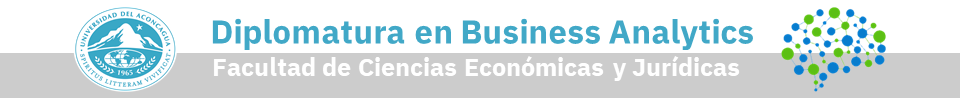

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Rotación de Clientes - Customer Churn

</font>
</center>

## Descripción dataset

Data Description

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

La deserción de clientes (también conocida como pérdida de clientes) es una de los mayores causas de pérdida de cualquier organización. Si pudiéramos averiguar por qué un cliente se va y cuándo se va con una precisión razonable, ayudaría enormemente a la organización a diseñar estrategias de fidelización.

#Objetivo

Lo que se pretende predecir el valor de CLTV (Customer life time value) dicha variable es el valor de vida del cliente, el cual mientras tenga un valor más alto mejor.
Basicamente es que tan fiel es el cliente a la empresa y esta compuesto de tres aristas:.

* Recencia: Cuándo fue la última vez que compró
* Frecuencia: Cuántas veces ha comprado en la empresa
* Valor monetario: Cuánto ha gastado el cliente en la empresa


# Carga de datos

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np

#escalar variables numericas
from sklearn.preprocessing import StandardScaler


In [3]:
#Pycaret

from pycaret.regression import *

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/train.csv", index_col=0)
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/test.csv", index_col=0)

In [5]:
train.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
5552,7838-LAZFO,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,Male,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
5805,8189-DUKMV,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,Female,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2640,3758-CKOQL,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,Female,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3976,5619-PTMIK,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,Female,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
6429,9115-YQHGA,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,Male,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


In [6]:
train.isnull().sum().sort_values(ascending=False)

Churn Reason         3863
Internet Service        0
CLTV                    0
Churn Label             0
Total Charges           0
Monthly Charges         0
Payment Method          0
Paperless Billing       0
Contract                0
Streaming Movies        0
Streaming TV            0
Tech Support            0
Device Protection       0
Online Backup           0
Online Security         0
CustomerID              0
Count                   0
Phone Service           0
Tenure Months           0
Dependents              0
Partner                 0
Senior Citizen          0
Gender                  0
Longitude               0
Latitude                0
Lat Long                0
Zip Code                0
City                    0
State                   0
Country                 0
Multiple Lines          0
dtype: int64

In [7]:
train.Count.describe()

count    5274.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64

In [8]:
for i in train.columns:
  #print(f"{train[i]}")
  print(f"{train[i].describe()}")

count           5274
unique          5274
top       7838-LAZFO
freq               1
Name: CustomerID, dtype: object
count    5274.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64
count              5274
unique                1
top       United States
freq               5274
Name: Country, dtype: object
count           5274
unique             1
top       California
freq            5274
Name: State, dtype: object
count            5274
unique           1127
top       Los Angeles
freq              237
Name: City, dtype: object
count     5274.000000
mean     93511.145810
std       1870.031645
min      90001.000000
25%      92086.000000
50%      93550.500000
75%      95350.000000
max      96161.000000
Name: Zip Code, dtype: float64
count                       5274
unique                      1648
top       34.098275, -117.967399
freq                           5
Name: Lat Long, dtype: object
count    

In [9]:
train.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
CLTV                    0
Churn Reason         3863
dtype: int64

***Churn Reason tiene 3863 nulos porque son la cantidad de clientes QUE NO SE FUERON y por lo tanto no tienen un motivo por el cual se han ido***

In [10]:
for i in train.columns:
  if ' ' in train[i].name:
      nombre_modificado = train[i].name.replace(' ', '_')
      train.rename(columns={train[i].name: nombre_modificado}, inplace=True)
      print("Nombre modificado:", nombre_modificado)
  else:
      print("El nombre no tiene espacios en blanco.")
      print(f"{train[i].name}")

El nombre no tiene espacios en blanco.
CustomerID
El nombre no tiene espacios en blanco.
Count
El nombre no tiene espacios en blanco.
Country
El nombre no tiene espacios en blanco.
State
El nombre no tiene espacios en blanco.
City
Nombre modificado: Zip_Code
Nombre modificado: Lat_Long
El nombre no tiene espacios en blanco.
Latitude
El nombre no tiene espacios en blanco.
Longitude
El nombre no tiene espacios en blanco.
Gender
Nombre modificado: Senior_Citizen
El nombre no tiene espacios en blanco.
Partner
El nombre no tiene espacios en blanco.
Dependents
Nombre modificado: Tenure_Months
Nombre modificado: Phone_Service
Nombre modificado: Multiple_Lines
Nombre modificado: Internet_Service
Nombre modificado: Online_Security
Nombre modificado: Online_Backup
Nombre modificado: Device_Protection
Nombre modificado: Tech_Support
Nombre modificado: Streaming_TV
Nombre modificado: Streaming_Movies
El nombre no tiene espacios en blanco.
Contract
Nombre modificado: Paperless_Billing
Nombre modifi

In [11]:
train.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
5552,7838-LAZFO,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,Male,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
5805,8189-DUKMV,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,Female,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2640,3758-CKOQL,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,Female,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3976,5619-PTMIK,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,Female,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
6429,9115-YQHGA,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,Male,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


In [12]:
train = train.drop(columns = ["CustomerID", "Count", "Country", "State", "Lat_Long", "Gender", "Zip_Code", "Latitude", "Longitude"])
train.head()

,City,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
5552,Hanford,No,Yes,No,45,Yes,No,DSL,Yes,Yes,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
5805,Rancho Cordova,No,Yes,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2640,Valyermo,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3976,Lemon Grove,No,Yes,No,46,Yes,Yes,DSL,Yes,No,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
6429,Lemoore,No,No,No,40,Yes,No,DSL,No,No,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


##División de variables numéricas y categóricas

In [13]:
#numericas
cols_numericas = list(train.select_dtypes(exclude=["object"]))
cols_numericas

['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV']

In [14]:
#categoricas
cols_categoricas = list(train.select_dtypes(include=["object"]))
cols_categoricas

['City',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn_Label',
 'Churn_Reason']

In [15]:
train.Monthly_Charges.describe()

count    5274.000000
mean       64.526251
std        30.095030
min        18.250000
25%        35.212500
50%        70.300000
75%        89.800000
max       118.750000
Name: Monthly_Charges, dtype: float64

In [16]:
train[cols_numericas].describe(percentiles=[.01,.1,.25,.50,.75,.90,.99])

,Tenure_Months,Monthly_Charges,Total_Charges,CLTV
count,5274.000000,5274.000000,5274.000000,5274.000000
mean,32.457907,64.526251,2277.733580,4402.844710
std,24.714333,30.095030,2274.193256,1184.379384
min,1.000000,18.250000,18.850000,2003.000000
1%,1.000000,19.200000,19.900000,2046.730000
10%,2.000000,20.050000,84.430000,2612.300000
25%,9.000000,35.212500,389.137500,3470.250000
50%,29.000000,70.300000,1378.600000,4521.000000
75%,56.000000,89.800000,3803.725000,5387.000000
90%,69.000000,102.485000,5995.285000,5859.700000


In [17]:
for i in train[cols_numericas]:
  fig = px.box(train, y = train[i])
  fig.show()

Tras haber observado los datos numericos, dichos datos se concentran de manera uniforme en el 99% de los casos.

No se observa necesidad de realizar poda de datos.

## Variables nulas

In [18]:
train.replace({None: "Es cliente"}, inplace = True)
train.head()

,City,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
5552,Hanford,No,Yes,No,45,Yes,No,DSL,Yes,Yes,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,Es cliente
5805,Rancho Cordova,No,Yes,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,Es cliente
2640,Valyermo,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,Es cliente
3976,Lemon Grove,No,Yes,No,46,Yes,Yes,DSL,Yes,No,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,Es cliente
6429,Lemoore,No,No,No,40,Yes,No,DSL,No,No,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,Es cliente


##Estandarización de datos

In [19]:
top_cities = train['City'].value_counts().nlargest(5).index
train['City_limited'] = train['City'].where(train['City'].isin(top_cities), 'Otros')

if 'City' in cols_categoricas:
    indice_city = cols_categoricas.index('City')
    cols_categoricas[indice_city] = 'City_limited'

train = train.drop(columns = ["City"])
print(cols_categoricas)


['City_limited', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn_Label', 'Churn_Reason']


In [20]:
# estandarizacion de churn reason
top_cr = train['Churn_Reason'].value_counts().nlargest(5).index
train['Churn_Reason_limited'] = train['Churn_Reason'].where(train['Churn_Reason'].isin(top_cr), 'Otros')

if 'Churn_Reason' in cols_categoricas:
    indice_cr = cols_categoricas.index('Churn_Reason')
    cols_categoricas[indice_cr] = 'Churn_Reason_limited'

train = train.drop(columns = ["Churn_Reason"])
print(cols_categoricas)

['City_limited', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn_Label', 'Churn_Reason_limited']


In [21]:
df1 = train[cols_numericas]

for i in train[cols_categoricas]:
  dummy_cols = pd.get_dummies(train[i], prefix= train[i].name)

  df1 = pd.concat([df1, dummy_cols], axis=1)

df1



,Tenure_Months,Monthly_Charges,Total_Charges,CLTV,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,...,Payment_Method_Electronic check,Payment_Method_Mailed check,Churn_Label_No,Churn_Label_Yes,Churn_Reason_limited_Attitude of support person,Churn_Reason_limited_Competitor offered higher download speeds,Churn_Reason_limited_Competitor offered more data,Churn_Reason_limited_Don't know,Churn_Reason_limited_Es cliente,Churn_Reason_limited_Otros
5552,45,78.80,3597.50,4192,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5805,4,20.50,79.05,3233,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2640,59,107.00,6152.30,4620,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3976,46,53.10,2459.80,3358,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
6429,40,51.10,2092.90,3355,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,32,19.75,624.15,4691,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4159,9,70.05,657.50,3522,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3218,7,93.85,635.60,3506,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3409,1,86.00,86.00,5359,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [21]:
#print(train[cols_numericas])

In [22]:
#scaled_columns = df1[cols_numericas]

# Inicializar el objeto StandardScaler
#scaler = StandardScaler()

# Aplicar el escalado a las columnas numéricas
#df1[cols_numericas] = scaler.fit_transform(scaled_columns)

In [23]:
#df1

#PyCaret

In [33]:
regresion = setup(data = df1,
                  target = "CLTV",
                  train_size = 0.80,
                  session_id = 123
                  )


,Description,Value
0,Session id,123
1,Target,CLTV
2,Target type,Regression
3,Original data shape,"(5274, 59)"
4,Transformed data shape,"(5274, 59)"
5,Transformed train set shape,"(4219, 59)"
6,Transformed test set shape,"(1055, 59)"
7,Numeric features,58
8,Preprocess,True
9,Imputation type,simple


In [34]:
regresion.dataset

,Tenure_Months,Monthly_Charges,Total_Charges,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,Senior_Citizen_No,...,Payment_Method_Mailed check,Churn_Label_No,Churn_Label_Yes,Churn_Reason_limited_Attitude of support person,Churn_Reason_limited_Competitor offered higher download speeds,Churn_Reason_limited_Competitor offered more data,Churn_Reason_limited_Don't know,Churn_Reason_limited_Es cliente,Churn_Reason_limited_Otros,CLTV
803,47,25.400000,1139.199951,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,3159
1522,17,44.450001,792.150024,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,3522
2991,72,82.300003,5980.549805,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,5219
3449,29,70.900002,1964.599976,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,2064
1783,1,49.000000,49.000000,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,5289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,29,70.750000,1974.800049,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,2663
6252,10,49.549999,475.700012,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,2392
6233,3,56.150002,168.149994,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,2539
1670,64,94.599998,5948.700195,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,5038


In [26]:
#los datos ya estan ajustados
regresion.dataset_transformed

,Tenure_Months,Monthly_Charges,Total_Charges,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,Senior_Citizen_No,...,Payment_Method_Mailed check,Churn_Label_No,Churn_Label_Yes,Churn_Reason_limited_Attitude of support person,Churn_Reason_limited_Competitor offered higher download speeds,Churn_Reason_limited_Competitor offered more data,Churn_Reason_limited_Don't know,Churn_Reason_limited_Es cliente,Churn_Reason_limited_Otros,CLTV
803,47.0,25.400000,1139.199951,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3159
1522,17.0,44.450001,792.150024,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3522
2991,72.0,82.300003,5980.549805,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5219
3449,29.0,70.900002,1964.599976,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2064
1783,1.0,49.000000,49.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,29.0,70.750000,1974.800049,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2663
6252,10.0,49.549999,475.700012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2392
6233,3.0,56.150002,168.149994,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2539
1670,64.0,94.599998,5948.700195,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5038


## Modelos

In [35]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [36]:
#modelos = compare_models()

modelos = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,883.1938,1084474.2748,1041.2352,0.2236,0.2690,0.2348,0.2030
gbr,Gradient Boosting Regressor,886.2174,1097365.0676,1047.3676,0.2145,0.2709,0.2364,0.6730
omp,Orthogonal Matching Pursuit,909.0874,1170461.5978,1081.7754,0.1620,0.2796,0.2448,0.0340
en,Elastic Net,908.6276,1170782.4342,1081.9300,0.1617,0.2798,0.2447,0.0400
br,Bayesian Ridge,908.8023,1170785.3021,1081.9323,0.1617,0.2797,0.2448,0.0390
llar,Lasso Least Angle Regression,909.3215,1174693.4805,1083.7310,0.1589,0.2801,0.2449,0.0360
lightgbm,Light Gradient Boosting Machine,909.0895,1175429.0349,1083.9516,0.1586,0.2793,0.2418,1.0550
lasso,Lasso Regression,909.6982,1175786.2107,1084.2364,0.1582,0.2802,0.2450,0.0740
ridge,Ridge Regression,910.4454,1178112.0379,1085.3077,0.1565,0.2805,0.2451,0.0340
lr,Linear Regression,910.4777,1178225.4929,1085.3590,0.1564,0.2805,0.2451,0.0740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [37]:
print(modelos)

[AdaBoostRegressor(random_state=123), GradientBoostingRegressor(random_state=123), OrthogonalMatchingPursuit(), ElasticNet(random_state=123), BayesianRidge()]


##Creación del modelo

In [38]:
modelo_01 = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,896.4746,1095639.8336,1046.7282,0.2434,0.2808,0.2520
1,887.8012,1069469.2717,1034.1515,0.2414,0.2575,0.2216
2,879.0238,1090653.7687,1044.3437,0.2073,0.2683,0.2327
3,856.7652,1036100.3286,1017.8901,0.2062,0.2578,0.2197
4,858.3054,1033553.6447,1016.6384,0.2334,0.2600,0.2242
5,868.3269,1054273.4057,1026.7782,0.2423,0.2631,0.2295
6,894.1131,1105922.3991,1051.6285,0.2408,0.2771,0.2441
7,886.6592,1090419.2957,1044.2314,0.1822,0.2649,0.2292
8,919.6056,1162217.4863,1078.0619,0.1975,0.2868,0.2551


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
#less vars
modelo_02 = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,896.4746,1095639.8336,1046.7282,0.2434,0.2808,0.2520
1,887.8012,1069469.2717,1034.1515,0.2414,0.2575,0.2216
2,879.0238,1090653.7687,1044.3437,0.2073,0.2683,0.2327
3,856.7652,1036100.3286,1017.8901,0.2062,0.2578,0.2197
4,858.3054,1033553.6447,1016.6384,0.2334,0.2600,0.2242
5,868.3269,1054273.4057,1026.7782,0.2423,0.2631,0.2295
6,894.1131,1105922.3991,1051.6285,0.2408,0.2771,0.2441
7,886.6592,1090419.2957,1044.2314,0.1822,0.2649,0.2292
8,919.6056,1162217.4863,1078.0619,0.1975,0.2868,0.2551


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##Optimizar modelo

In [31]:
optimizar_modelo_01 = tune_model(modelo_01)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,893.2427,1090120.0583,1044.0881,0.2472,0.2801,0.2508
1,887.2159,1067367.0669,1033.1346,0.2429,0.2578,0.2224
2,877.9109,1086374.5477,1042.2929,0.2104,0.2682,0.2330
3,855.0159,1027150.1962,1013.4842,0.2131,0.2573,0.2204
4,860.2398,1032518.4689,1016.1292,0.2342,0.2594,0.2240
5,867.1870,1050645.6728,1025.0101,0.2449,0.2632,0.2299
6,894.5577,1105639.1809,1051.4938,0.2410,0.2766,0.2435
7,882.4939,1076603.5888,1037.5951,0.1926,0.2640,0.2293
8,920.0060,1162844.6007,1078.3527,0.1971,0.2870,0.2554


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [31]:
optimizar_modelo_02 = tune_model(modelo_02)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,895.1860,1093935.2731,1045.9136,0.2446,0.2806,0.2516
1,885.2517,1063668.6642,1031.3431,0.2455,0.2577,0.2225
2,878.3105,1088718.4573,1043.4167,0.2087,0.2685,0.2332
3,854.6803,1025831.7132,1012.8335,0.2141,0.2574,0.2206
4,860.4558,1033716.5749,1016.7185,0.2333,0.2597,0.2242
5,867.1315,1050449.3336,1024.9143,0.2450,0.2629,0.2294
6,894.1606,1105972.6907,1051.6524,0.2408,0.2763,0.2428
7,883.1501,1078543.7225,1038.5296,0.1912,0.2641,0.2293
8,920.7500,1162164.8436,1078.0375,0.1976,0.2864,0.2548


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##Predicción

In [32]:
#Modelo ada less vars
predict_model(optimizar_modelo_02)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,898.2276,1111143.0402,1054.1077,0.2043,0.2710,0.2380


,Tenure_Months,Monthly_Charges,Total_Charges,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,Senior_Citizen_No,...,Churn_Label_No,Churn_Label_Yes,Churn_Reason_limited_Attitude of support person,Churn_Reason_limited_Competitor offered higher download speeds,Churn_Reason_limited_Competitor offered more data,Churn_Reason_limited_Don't know,Churn_Reason_limited_Es cliente,Churn_Reason_limited_Otros,CLTV,prediction_label
2802,71,19.799999,1388.449951,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,5819,5241.196911
3697,72,90.800003,6511.799805,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,6188,5221.541803
5893,4,61.299999,249.399994,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,5281,4009.671268
3459,56,104.550003,5794.649902,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,6268,5221.541803
4768,71,89.449997,6435.250000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,6004,5202.424963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,29,70.750000,1974.800049,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,2663,4006.610588
6252,10,49.549999,475.700012,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,2392,4009.671268
6233,3,56.150002,168.149994,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,2539,4011.691419
1670,64,94.599998,5948.700195,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,5038,5230.071603


In [32]:
#Modelo ada
predict_model(optimizar_modelo_01)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,898.4172,1111467.2697,1054.2615,0.2041,0.2710,0.2378


,Tenure_Months,Monthly_Charges,Total_Charges,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,Senior_Citizen_No,...,Churn_Reason_Long distance charges,Churn_Reason_Moved,Churn_Reason_Network reliability,Churn_Reason_Poor expertise of online support,Churn_Reason_Poor expertise of phone support,Churn_Reason_Price too high,Churn_Reason_Product dissatisfaction,Churn_Reason_Service dissatisfaction,CLTV,prediction_label
2802,71,19.799999,1388.449951,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,5819,5224.605199
3697,72,90.800003,6511.799805,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6188,5213.503692
5893,4,61.299999,249.399994,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5281,4006.134151
3459,56,104.550003,5794.649902,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6268,5218.193893
4768,71,89.449997,6435.250000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6004,5210.439799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,29,70.750000,1974.800049,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2663,4006.134151
6252,10,49.549999,475.700012,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2392,3992.215598
6233,3,56.150002,168.149994,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2539,4007.899752
1670,64,94.599998,5948.700195,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5038,5213.503692


In [ ]:
#Modelo de random forest
predict_model(optimizar_modelo_01)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,905.9365,1134331.6176,1065.0501,0.1877,0.2735,0.2401


,Tenure_Months,Monthly_Charges,Total_Charges,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,Senior_Citizen_No,...,Churn_Reason_Long distance charges,Churn_Reason_Moved,Churn_Reason_Network reliability,Churn_Reason_Poor expertise of online support,Churn_Reason_Poor expertise of phone support,Churn_Reason_Price too high,Churn_Reason_Product dissatisfaction,Churn_Reason_Service dissatisfaction,CLTV,prediction_label
2802,71,19.799999,1388.449951,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,5819,5240.622502
3697,72,90.800003,6511.799805,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6188,5082.238721
5893,4,61.299999,249.399994,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5281,4025.203843
3459,56,104.550003,5794.649902,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6268,5141.147320
4768,71,89.449997,6435.250000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6004,5097.067462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,29,70.750000,1974.800049,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2663,4032.692508
6252,10,49.549999,475.700012,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2392,3950.593786
6233,3,56.150002,168.149994,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2539,3987.406437
1670,64,94.599998,5948.700195,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5038,5192.190588


##Evaluación del modelo

In [34]:
evaluate_model(optimizar_modelo_01)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Trabajo a realizar

**Explicar trabajo a realizar**